In [5]:
# 라이브러리 불러오기 
import pandas as pd 

# 데이터 불러오기
user_data = pd.read_csv('aiffel/customer_segmentation/user_data_은희님거.csv')

# 데이터의 상위 5번째 행까지 출력
user_data.head()

,CustomerID,purchase_cnt,item_cnt,recency,user_total,user_average,unique_products,average_interval,total_transactions,cancel_frequency,cancel_rate
0,15488,1,72,92,76.3,76.3,1,0.0,1,0.0,0.0
1,15070,1,36,372,106.2,106.2,1,0.0,1,0.0,0.0
2,18068,1,6,289,101.7,101.7,1,0.0,1,0.0,0.0
3,15510,1,2,330,250.0,250.0,1,0.0,1,0.0,0.0
4,13307,1,4,120,15.0,15.0,1,0.0,1,0.0,0.0


In [6]:
from scipy import stats
import numpy as np

In [7]:
# Z-score 계산 
z_scores = stats.zscore(user_data.iloc[:, 1:], axis=0)  

# Z-score 절대값 계산
z_scores = np.abs(z_scores)

# Z-score 출력
z_scores

,purchase_cnt,item_cnt,recency,user_total,user_average,unique_products,average_interval,total_transactions,cancel_frequency,cancel_rate
0,0.396911,0.223918,0.002895,0.219998,0.239940,0.704913,0.295648,0.396911,0.296537,0.296537
1,0.396911,0.231629,2.776234,0.216380,0.405216,0.704913,0.295648,0.396911,0.296537,0.296537
2,0.396911,0.238055,1.954137,0.216925,0.380342,0.704913,0.295648,0.396911,0.296537,0.296537
3,0.396911,0.238911,2.360233,0.198982,1.200089,0.704913,0.295648,0.396911,0.296537,0.296537
4,0.396911,0.238483,0.280229,0.227415,0.098903,0.704913,0.295648,0.396911,0.296537,0.296537
...,...,...,...,...,...,...,...,...,...,...
4357,0.379387,0.240411,0.983468,0.232145,0.208350,0.658051,3.390275,0.379387,9.833000,9.833000
4358,0.379387,0.244266,2.776234,0.241631,0.295134,0.658051,0.295648,0.379387,9.833000,9.833000
4359,0.379387,0.291604,2.766329,0.373475,1.499604,0.658051,0.295648,0.379387,9.833000,9.833000
4360,0.335580,0.299744,2.429566,0.327462,0.480862,0.540895,0.295648,0.335580,9.833000,9.833000


In [8]:
# 임계값(threshold) 설정
threshold = 3

# z-score 기준으로 이상치를 찾아서 outlier 컬럼에 이상치 여부 기입 (0: 정상, 1:이상치)
user_data['outlier'] = (z_scores > threshold).any(axis=1).astype(int)
user_data.head()

,CustomerID,purchase_cnt,item_cnt,recency,user_total,user_average,unique_products,average_interval,total_transactions,cancel_frequency,cancel_rate,outlier
0,15488,1,72,92,76.3,76.3,1,0.0,1,0.0,0.0,0
1,15070,1,36,372,106.2,106.2,1,0.0,1,0.0,0.0,0
2,18068,1,6,289,101.7,101.7,1,0.0,1,0.0,0.0,0
3,15510,1,2,330,250.0,250.0,1,0.0,1,0.0,0.0,0
4,13307,1,4,120,15.0,15.0,1,0.0,1,0.0,0.0,0


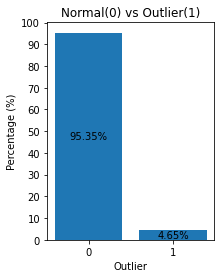

In [9]:
# 시각화에 필요한 라이브러리 불러오기
import matplotlib.pyplot as plt 

# user_data['outlier']을 활용하여 이상치 여부에 따른 확률 계산
# value_counts()는 열의 고윳값의 개수를 반환하지만 normalize=True를 사용하면 열에 있는 값의 개수 비율(상대적 빈도)을 반환함
outlier_percentage = pd.value_counts(user_data['outlier'], normalize=True) * 100

# 시각화 자료 크기 조정
plt.figure(figsize=(3, 4))

# outlier_percentage라는 데이터로 bar chart 시각화
# x축 값을 0과 1로 지정
bars = plt.bar(['0', '1'], outlier_percentage)

# 퍼센트(%) 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval/2, f'{yval:.2f}%', fontsize=10, va='center', ha='center')

plt.title('Normal(0) vs Outlier(1)') # 표 제목
plt.yticks(ticks=np.arange(0, 101, 10)) # y축 표기 (0~100까지 10단위로 증가)
plt.ylabel('Percentage (%)') # y축 범례
plt.xlabel('Outlier') # x축 범례
plt.show() # 출력

In [10]:
# 정상 데이터만 필터링 
user_data = user_data[user_data['outlier'] == 0] 

# outlier 컬럼 삭제 
user_data = user_data.drop(columns=['outlier'])

# DataFrame의 인덱스를 리셋하고, 이전 인덱스를 컬럼으로 추가하지 않음
user_data.reset_index(inplace=True, drop=True)
user_data.head()

,CustomerID,purchase_cnt,item_cnt,recency,user_total,user_average,unique_products,average_interval,total_transactions,cancel_frequency,cancel_rate
0,15488,1,72,92,76.3,76.3,1,0.0,1,0.0,0.0
1,15070,1,36,372,106.2,106.2,1,0.0,1,0.0,0.0
2,18068,1,6,289,101.7,101.7,1,0.0,1,0.0,0.0
3,15510,1,2,330,250.0,250.0,1,0.0,1,0.0,0.0
4,13307,1,4,120,15.0,15.0,1,0.0,1,0.0,0.0


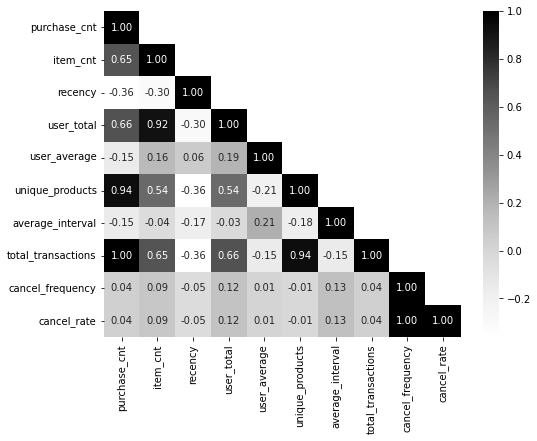

In [11]:
# 시각화 라이브러리 불러오기
import seaborn as sns  

# 'CustomerID' 열을 제외(drop)하고 상관 관계 행렬 계산(corr())
corr = user_data.drop(columns=['CustomerID']).corr()

# 행렬이 대각선을 기준으로 대칭이기 때문에 하단만 표시하기 위한 마스크 생성
mask = np.zeros_like(corr) # np.zeros_like()는 0으로 가득찬 array 생성, 크기는 corr와 동일   
mask[np.triu_indices_from(mask, k=1)] = True # array의 대각선 영역과 그 윗 부분에 True가 들어가도록 설정

# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(corr, mask=mask, cmap='Greys', annot=True, fmt='.2f')
plt.show()

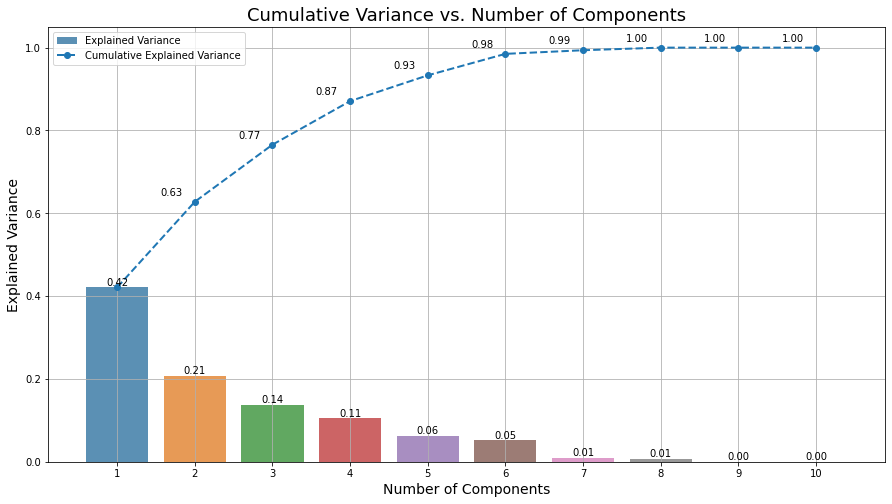

,PC1,PC2,PC3,PC4,PC5,PC6
CustomerID,,,,,,
15488,-1.702408,-0.433080,0.821681,0.512938,-0.724754,0.837552
15070,-2.370594,-0.461316,1.046247,2.582405,1.185860,0.802119
18068,-2.189029,-0.441210,1.044788,1.993408,0.624163,0.897025
15510,-2.392354,0.009242,3.562447,3.332684,0.888723,3.191899
13307,-1.742972,-0.642176,-0.281841,0.246073,-0.518863,-0.170426


In [12]:
# Standard Scaler 불러오기 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# 원본 데이터에 영향을 주지 않기 위해 복사 
data = user_data.copy()

# CustomerID를 제외한 데이터에 스케일링 적용
columns_list = data.iloc[:, 1:].columns # iloc: 데이터 특정 값 추출, columns: 데이터프레임의 열 이름 조회 
data[columns_list] = scaler.fit_transform(data[columns_list])

# 스케일링 된 데이터 출력
data.head()

# PCA 불러오기  
from sklearn.decomposition import PCA

# CustomerID를 인덱스로 지정  
data.set_index('CustomerID', inplace=True)

# PCA 적용
pca = PCA().fit(data)

# Explained Variance의 누적합 계산  
explained_variance_ratio = pca.explained_variance_ratio_ # explained_variance_ratio_: Explained Variance 비율을 계산해 주는 함수
cumulative_explained_variance = np.cumsum(explained_variance_ratio) # cumsum: 각 원소의 누적합을 계산하는 함수

plt.figure(figsize=(15, 8)) 

# 각 성분의 설명된 분포에 대한 막대 그래프
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)), y=explained_variance_ratio, alpha=0.8)

# 누적 분포에 대한 선 그래프
lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance, marker='o', linestyle='--', linewidth=2)

# 레이블과 제목 설정
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Variance vs. Number of Components', fontsize=18)

# 눈금 및 범례 사용자 정의
plt.xticks(range(0, len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot],
           labels=['Explained Variance', 'Cumulative Explained Variance'])  

# 두 그래프의 분산 값 표시
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(axis='both')   
plt.show()

# 6개의 주성분을 유지하는 PCA 선언 
pca = PCA(n_components=6)

# 기존 data를 pca에 fit_transform
data_pca = pca.fit_transform(data)

# 압축된 데이터 셋 생성
data_pca = pd.DataFrame(data_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

# 인덱스로 빼 두었던 CustomerID 다시 추가
data_pca.index = data.index

data_pca.head()

In [14]:
from sklearn.cluster import KMeans
from collections import Counter

# k=3개의 클러스터로 K-Means 클러스터링 적용
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=100, random_state=0)
kmeans.fit(data_pca)

# 각 클러스터의 빈도수 구하기
cluster_frequencies = Counter(kmeans.labels_) 

# 빈도수에 기반하여 이전 레이블에서 새 레이블로의 매핑 생성
label_mapping = {label: new_label for new_label, (label, _) in 
                 enumerate(cluster_frequencies.most_common())}

# 매핑을 적용하여 새 레이블 얻기
new_labels = np.array([label_mapping[label] for label in kmeans.labels_])

# 원래 데이터셋에 새 클러스터 레이블 추가
user_data['cluster'] = new_labels

# PCA 버전의 데이터셋에 새 클러스터 레이블 추가
data_pca['cluster'] = new_labels

# K-Means 분류된 결과 보기
user_data.head()

# 각 군집별로 몇 명의 고객이 있는지 확인
user_data.value_counts('cluster')

cluster
0    3185
1     598
2     376
dtype: int64

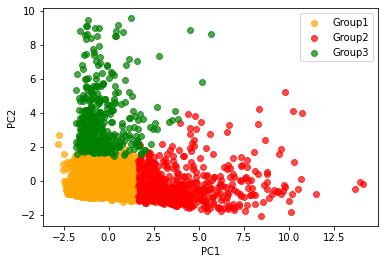

In [15]:
# 각 클러스터 별 데이터 분리 
cluster_0 = data_pca[data_pca['cluster'] == 0]
cluster_1 = data_pca[data_pca['cluster'] == 1]
cluster_2 = data_pca[data_pca['cluster'] == 2]


# 클러스터 별 시각화
plt.scatter(cluster_0['PC1'], cluster_0['PC2'], color = 'orange', alpha = 0.7, label = 'Group1')
plt.scatter(cluster_1['PC1'], cluster_1['PC2'], color = 'red', alpha = 0.7, label = 'Group2')
plt.scatter(cluster_2['PC1'], cluster_2['PC2'], color = 'green', alpha = 0.7, label = 'Group3')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()



In [ ]:
!pip install plotly==5.18.0

# 색상 지정 
colors = ['red', 'blue', 'green']

# 각 클러스터별 데이터 분릴
cluster_0 = data_pca[data_pca['cluster'] == 0]
cluster_1 = data_pca[data_pca['cluster'] == 1]
cluster_2 = data_pca[data_pca['cluster'] == 2]

# 3D Scatter Plot 생성
import plotly.graph_objects as go
fig = go.Figure()

# 각 클러스터별 데이터 표기 
fig.add_trace(go.Scatter3d(x=cluster_0['PC1'], y=cluster_0['PC2'], z=cluster_0['PC3'], 
                           mode='markers', marker=dict(color=colors[0], size=5, opacity=0.4), name='Group 1'))
fig.add_trace(go.Scatter3d(x=cluster_1['PC1'], y=cluster_1['PC2'], z=cluster_1['PC3'], 
                           mode='markers', marker=dict(color=colors[1], size=5, opacity=0.4), name='Group 2'))
fig.add_trace(go.Scatter3d(x=cluster_2['PC1'], y=cluster_2['PC2'], z=cluster_2['PC3'], 
                           mode='markers', marker=dict(color=colors[2], size=5, opacity=0.4), name='Group 3'))

# 범례 및 제목 영역 설정
fig.update_layout(
    title=dict(text='3D Visualization of Customer Clusters in PCA Space', x=0.5),
    scene=dict(
        xaxis=dict(backgroundcolor="grey", gridcolor='white', title='PC1'),
        yaxis=dict(backgroundcolor="grey", gridcolor='white', title='PC2'),
        zaxis=dict(backgroundcolor="grey", gridcolor='white', title='PC3'),
    ),
    width=900,
    height=800
)

fig.show()

group1 = user_data[user_data['cluster'] == 0]
group2 = user_data[user_data['cluster'] == 1]
group3 = user_data[user_data['cluster'] == 2]

group1.describe()
group2.describe()
group3.describe()